<a href="https://colab.research.google.com/github/lambhua/Machine-Learning/blob/main/Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DECISIONTREE CLASSIFIER**

A decision tree is a supervised learning algorithm used for both classification and regression problems. Simply put, it takes the form of a tree with branches representing the potential answers to a given question.

**Parameters OF Algorithm**

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

#Applications of Decision Tree

Fraud detection

Credit Risk

Loan Default

Predictinf sales of Retail Outlet

Employee Attrition

Customer Churn

**IMPORTING lIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
# We will load titanic data fron seaborn library
data=sns.load_dataset('titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.isnull().sum()  # finding null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Feature Selection**

In [12]:
df=data[['survived','sex','age','class','adult_male','alone']]

**Data Preprocessing**

Data has null values in age column - filling null values with mean of age column

Changing Categorical data to numerical values

In [13]:
df.head()

,survived,sex,age,class,adult_male,alone
0,0,male,22.0,Third,True,False
1,1,female,38.0,First,False,False
2,1,female,26.0,Third,False,True
3,1,female,35.0,First,False,False
4,0,male,35.0,Third,True,True


In [34]:
df.replace({'male':1,'female':0,'Third':3,'First':1,'Second':2,'True':1,'False':0},inplace=True)

<ipython-input-34-ca1ce673bc20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'male':1,'female':0,'Third':3,'First':1,'Second':2,'True':1,'False':0},inplace=True)


In [37]:
df['age']=df['age'].fillna(df['age'].mean()) # filled the missing value with mean age values

<ipython-input-37-b8d4b1d9134c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].fillna(df['age'].mean()) # filled the missing value with mean age values


In [35]:
#checking null values
df.isnull().sum()

survived      0
sex           0
age           0
class         0
adult_male    0
alone         0
dtype: int64

In [36]:
df.survived.value_counts(normalize=True) # normalize will give % of counts


0    0.616162
1    0.383838
Name: survived, dtype: float64

In [38]:
df.isnull().sum()

survived      0
sex           0
age           0
class         0
adult_male    0
alone         0
dtype: int64

In [42]:
X=df.drop('survived',axis=1)
y=df['survived']

In [43]:
X.shape ,y.shape

((891, 5), (891,))

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [45]:
dt=DecisionTreeClassifier(random_state=10)   # using gini to split data
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [46]:
dt.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [47]:
# optimising model using max_depth parameter
from sklearn.metrics import accuracy_score
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
    dt=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt.fit(X_train,y_train)
    train_accuracy.append(dt.score(X_train,y_train))
    test_accuracy.append(dt.score(X_test,y_test))

In [48]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.789326,0.787709
1,2,0.806180,0.776536
2,3,0.807584,0.776536
3,4,0.823034,0.782123
4,5,0.837079,0.770950
5,6,0.841292,0.776536
6,7,0.853933,0.765363
7,8,0.860955,0.770950
8,9,0.872191,0.770950


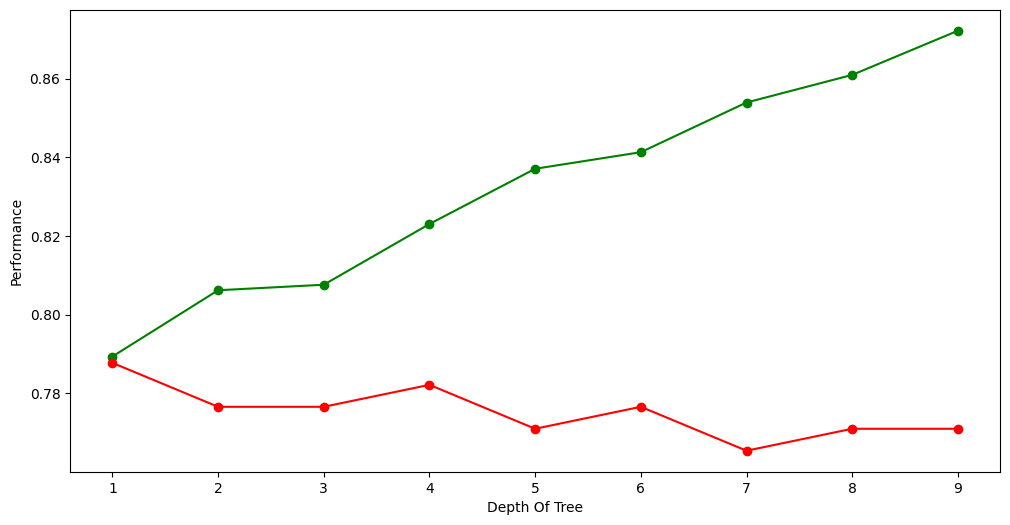

In [49]:
# with max depth of 8 test accuracy is highest
#Plotting the values
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o',color='green')
plt.plot(frame['max_depth'],frame['test_acc'],marker='o',color='red')
plt.xlabel('Depth Of Tree')
plt.ylabel('Performance')
plt.show()

In [50]:
# lets use other parameters and see model performance
# With these parameters we see that accuracy score is nearly same
# on train and test data hence its a more accurate model
dt=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=25,random_state=10)
dt.fit(X_train,y_train)

0.848314606741573

In [51]:
dt.score(X_test,y_test)

0.7988826815642458

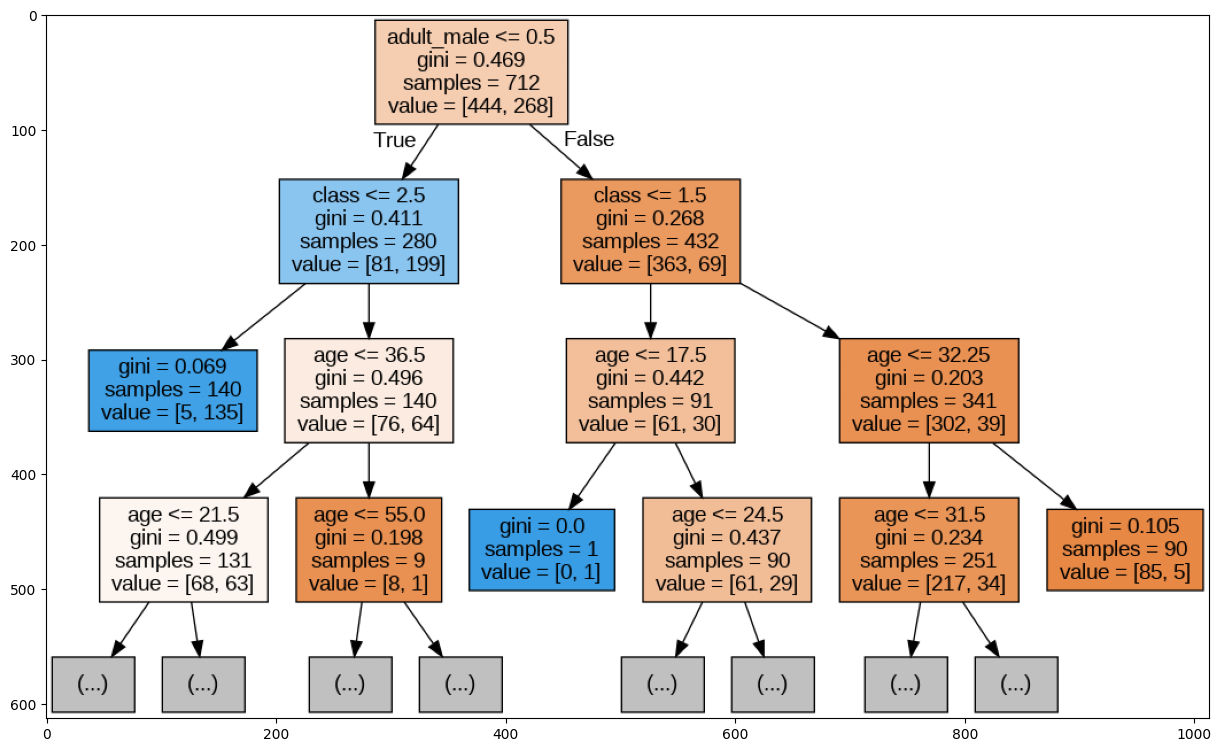

In [54]:
#Plotting a decision tree
from sklearn import tree
decision_tree=tree.export_graphviz(dt,out_file='tree.dot',feature_names=X_train.columns,max_depth=3,filled=True)
!dot -Tpng tree.dot -o tree.png
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)